In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

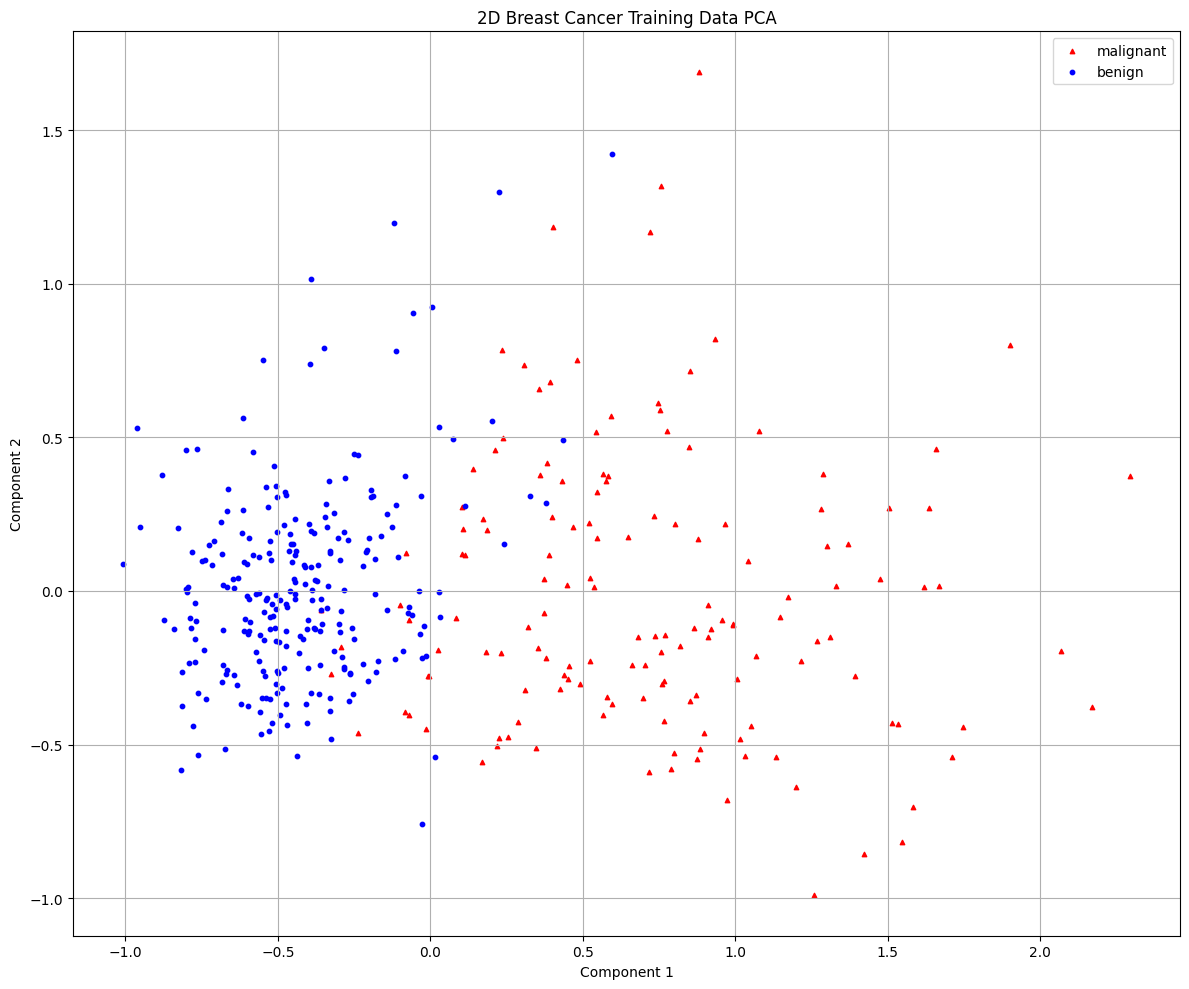

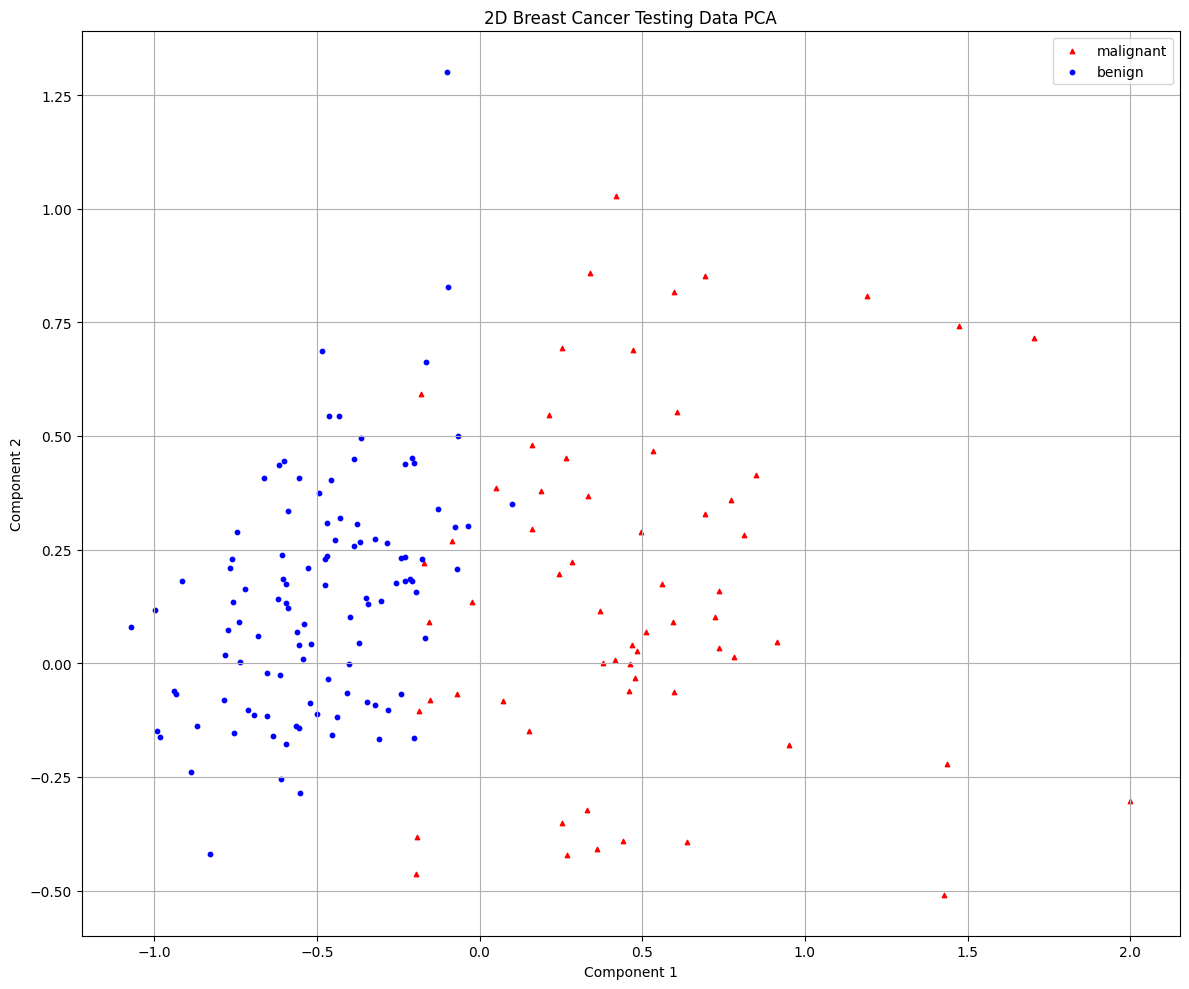

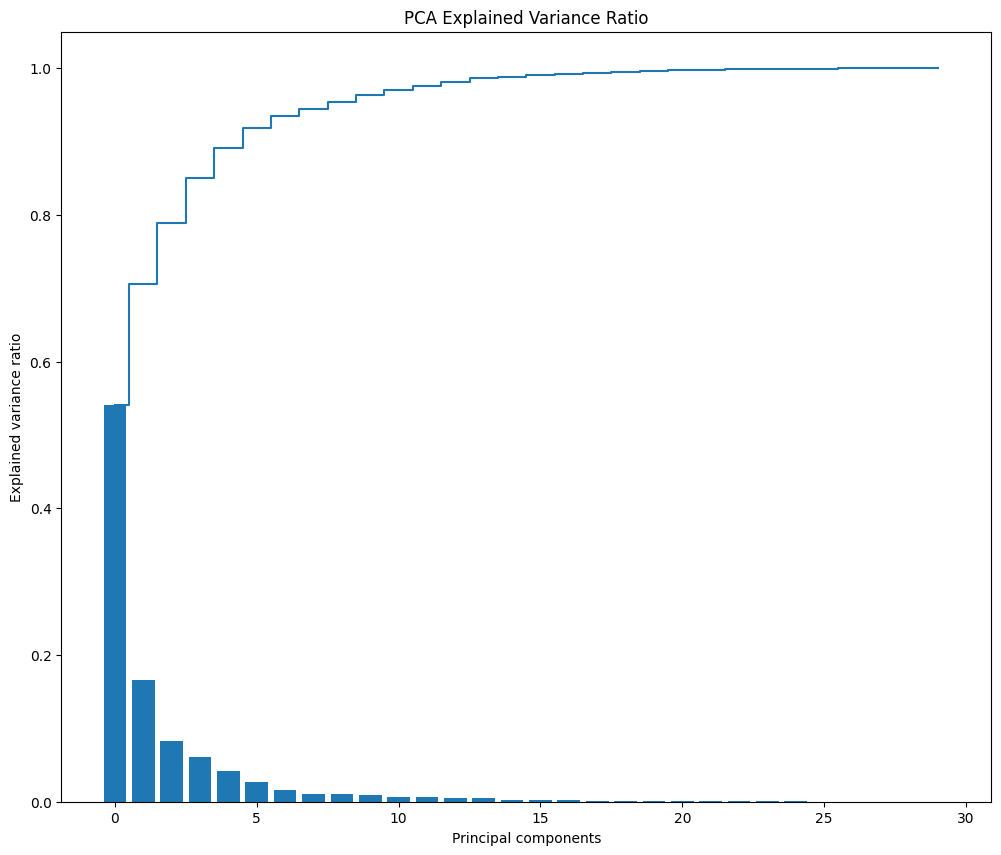

In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})

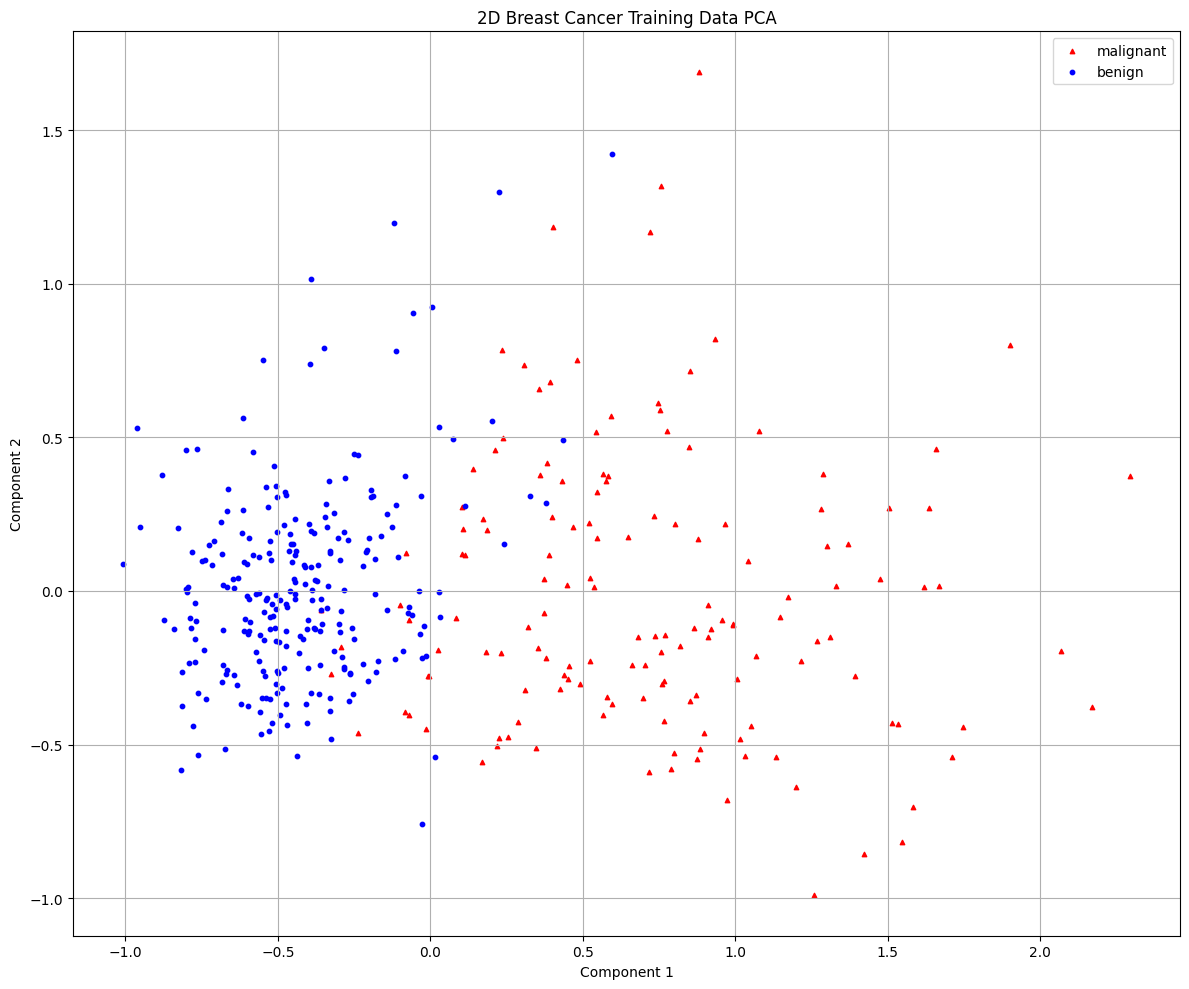

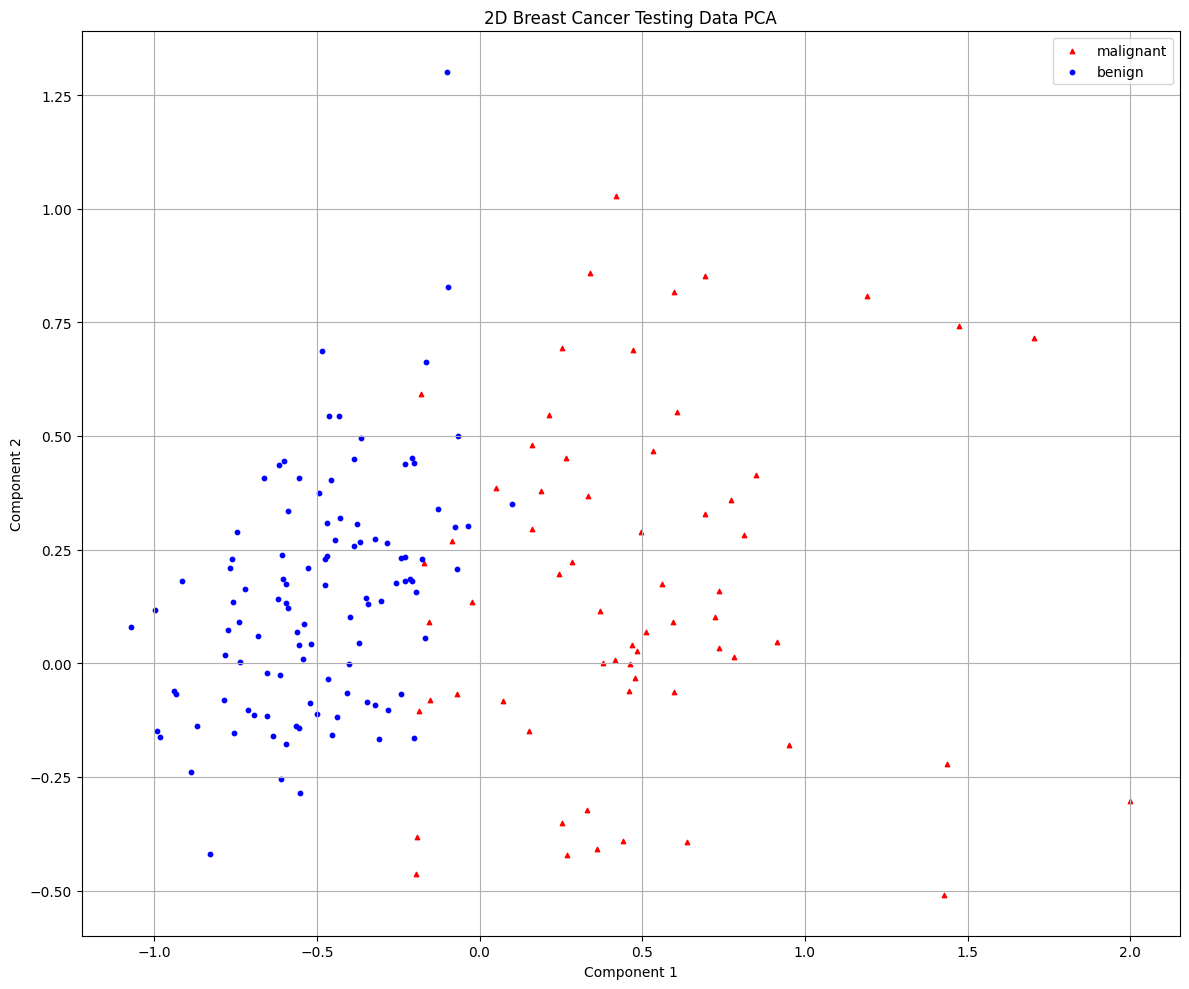

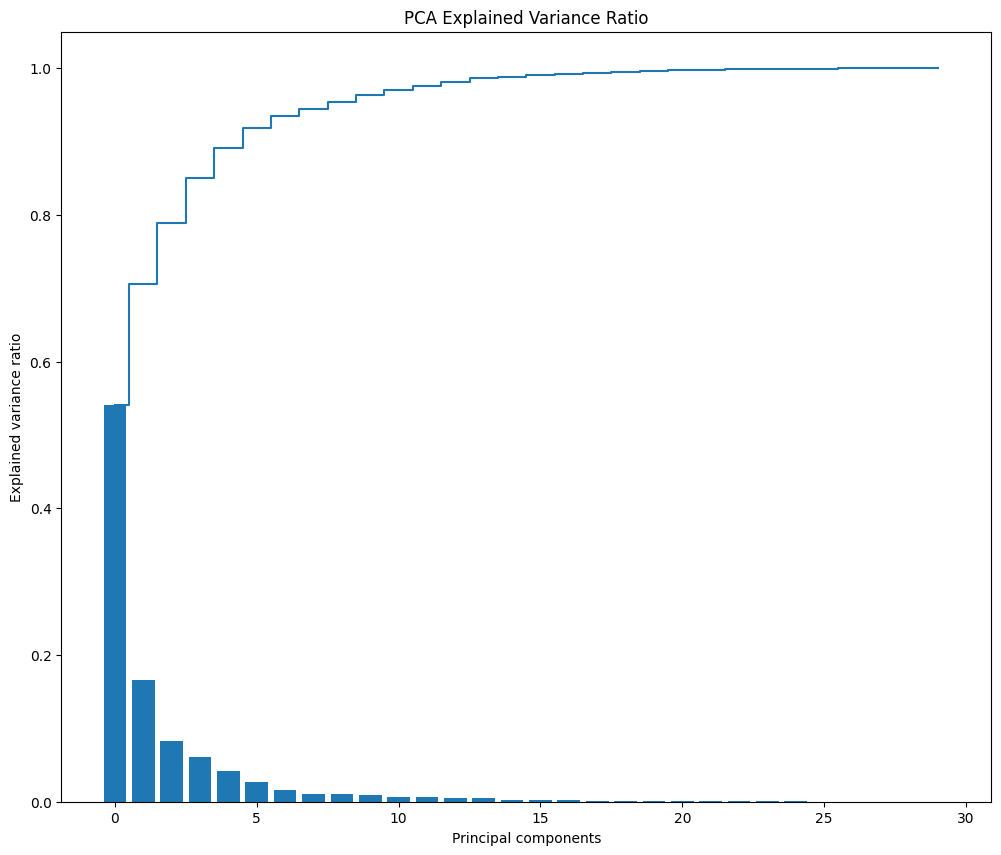

[I 2025-04-27 18:12:15,918] A new study created in memory with name: no-name-332da24c-fdd8-43b2-aa3e-b80ec623ed10
[I 2025-04-27 18:12:29,784] Trial 0 finished with value: 0.949746835443038 and parameters: {'n_estimators': 6036, 'max_depth': 13, 'learning_rate': 0.05560234952318275, 'subsample': 0.8618420038322017, 'colsample_bytree': 0.9689107481076287, 'gamma': 1.7677105901192207, 'reg_alpha': 0.0605059109110722, 'reg_lambda': 3.224877469629305e-08}. Best is trial 0 with value: 0.949746835443038.
[I 2025-04-27 18:12:33,842] Trial 1 finished with value: 0.9521835443037976 and parameters: {'n_estimators': 1081, 'max_depth': 5, 'learning_rate': 0.030527488529152026, 'subsample': 0.603336024799251, 'colsample_bytree': 0.7804803698771536, 'gamma': 0.2509158705105563, 'reg_alpha': 0.002681726699829825, 'reg_lambda': 0.09986958506529174}. Best is trial 1 with value: 0.9521835443037976.
[I 2025-04-27 18:12:54,650] Trial 2 finished with value: 0.9447468354430381 and parameters: {'n_estimators'

Best trial:
Accuracy: 0.9623417721518986
Best hyperparameters:  {'n_estimators': 1439, 'max_depth': 4, 'learning_rate': 0.009216244428892932, 'subsample': 0.8626618977396323, 'colsample_bytree': 0.7590107447743615, 'gamma': 1.5023337617340582, 'reg_alpha': 0.0003272134633365092, 'reg_lambda': 0.0007947693268187764}


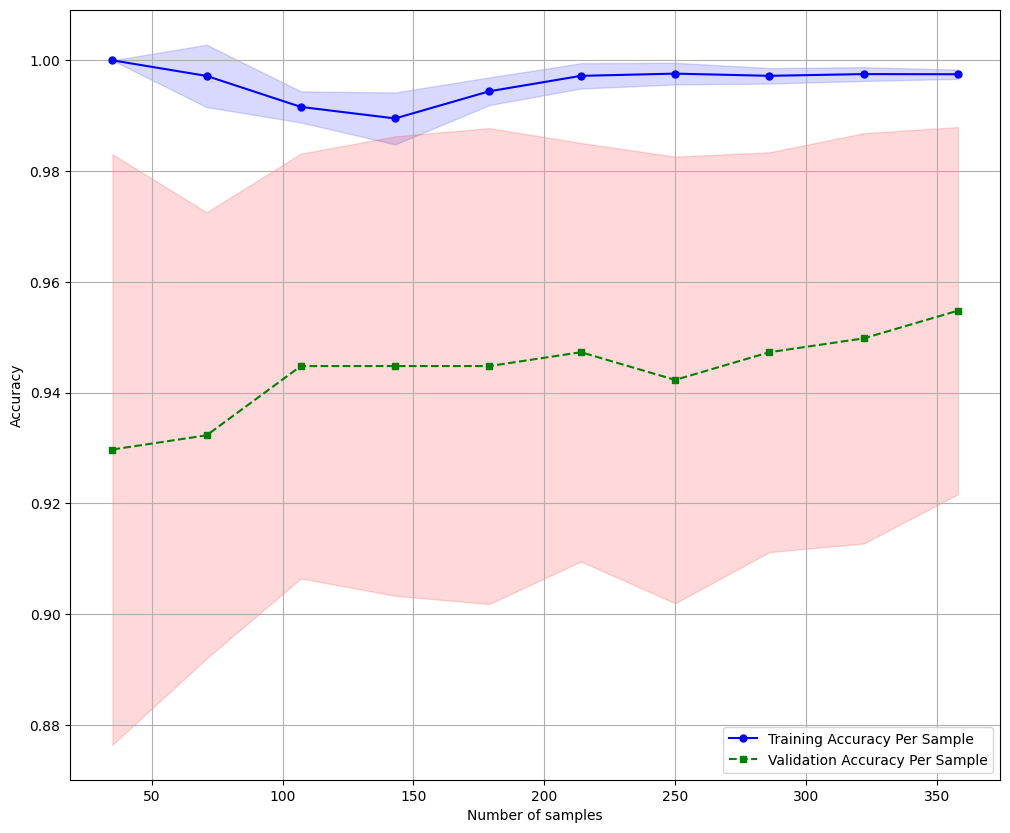

Confusion Matrix
[[ 53  11]
 [  1 106]]
Accuracy: 0.9298, Precision: 0.9060, Recall: 0.9907, F1: 0.9464, AUC: 0.9914


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'pca', {})
helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)